In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [11]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2020/05/01'
end = '2022/05/29'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

In [12]:
Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

In [13]:
daily_returns  # เรียกดูตัวอย่างข้อมูล

Symbols,HealthCare,ConsumerDiscretionary,Technology,ConsumerStaples,Utilities,Financial,Industrial,Energy,BasicMaterials
Date,,,,,,,,,
2020-05-01,-0.019051,-0.037393,-0.027459,-0.010985,-0.024100,-0.032032,-0.030213,-0.056579,-0.021010
2020-05-04,-0.000511,0.005435,0.013273,-0.000521,0.007516,-0.009066,-0.012687,0.034588,0.003544
2020-05-05,0.021681,0.003633,0.013766,0.000868,0.008171,-0.003202,0.003904,0.000809,0.002550
2020-05-06,-0.009910,-0.000177,0.007775,-0.010930,-0.034003,-0.021570,-0.013772,-0.026131,-0.017221
2020-05-07,-0.000101,0.015719,0.014995,-0.002806,0.004013,0.023452,0.011664,0.026003,0.020510
...,...,...,...,...,...,...,...,...,...
2022-05-23,0.008784,0.007478,0.022967,0.020651,0.011988,0.032503,0.016381,0.026416,0.018321
2022-05-24,0.002979,-0.025732,-0.014843,0.016352,0.019973,-0.002060,-0.000548,0.003813,-0.005719
2022-05-25,-0.000305,0.028225,0.011660,0.000273,-0.000675,0.007960,0.005814,0.020653,0.004434


Text(0.5, 1.0, 'Sector Correlation')

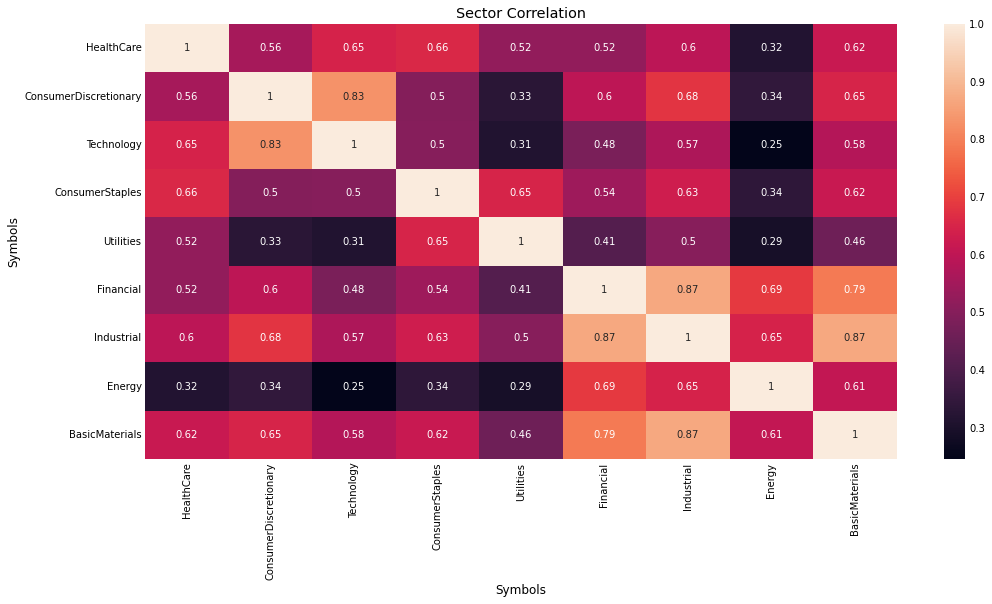

In [14]:
# calculate the correlation matrix
corr = daily_returns.corr()

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, ).set_title("Sector Correlation")

<AxesSubplot:xlabel='Date'>

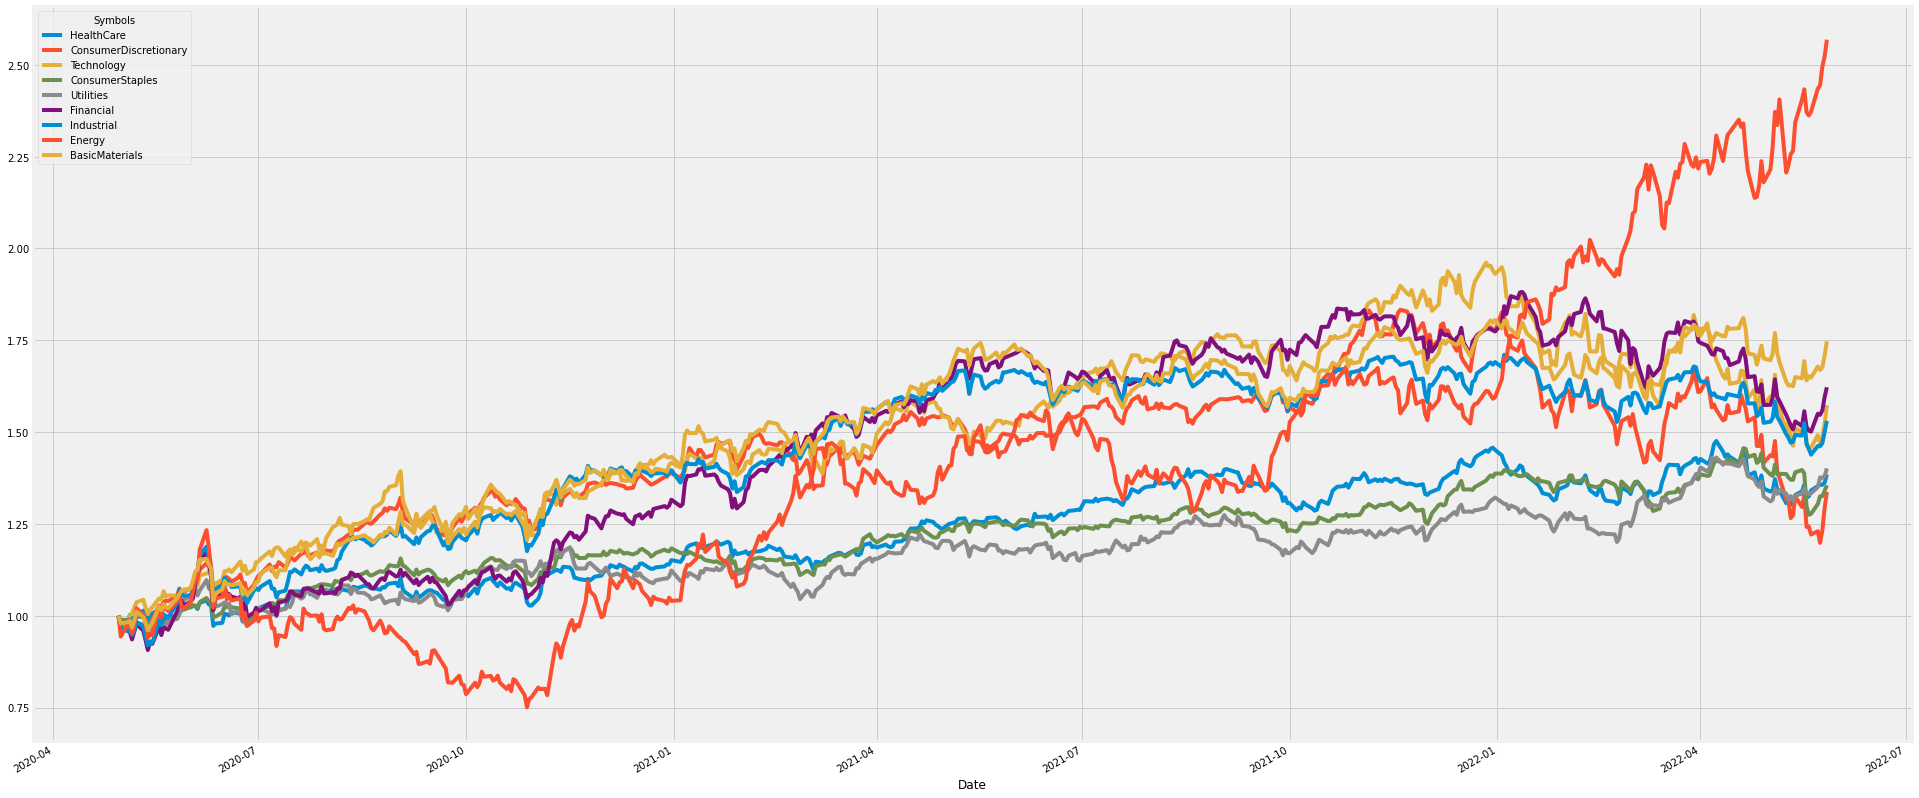

In [15]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

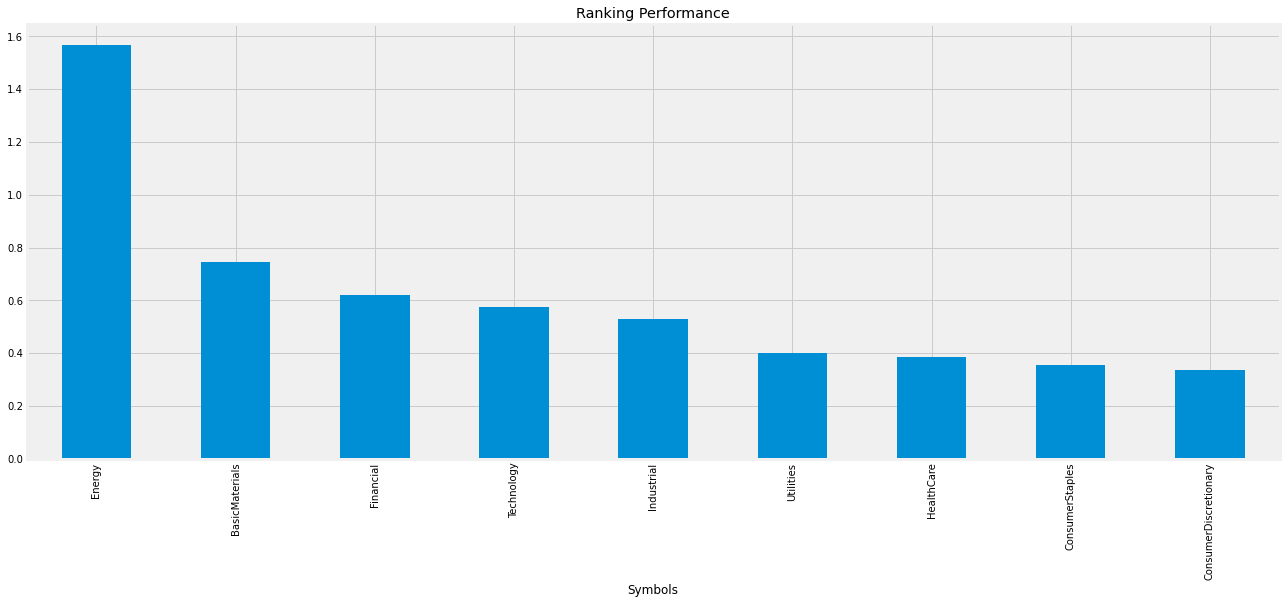

In [16]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")